In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [2]:
import pandas as pd
import numpy as np
import sqlite3
import json

In [3]:
with open('../config.json', 'r') as f:
    config = json.load(f)

In [4]:
for dictionary in config:
    dictionary.keys()

dict_keys(['threshold_nan'])

dict_keys(['database_path', 'prvdr_category_file', 'icd9_procedure_code_category_file', 'hcpcs_code_category_file', 'eda_report_location', 'model_repository_location'])

dict_keys(['ICD9_DIAGNOSIS_CODE_CATEGORY_URL', 'HCPCS_CATEGORY_URL'])

dict_keys(['HIGH_CARDINALITY_THRESHOLD', 'INFREQUENT_CATEGORY_CUT_OFF', 'DEFAULT_INFREQUENT_CATEGORY_CUT_OFF', 'INFREQUENT_CATEGORY_LABEL', 'DEFAULT_INFREQUENT_CATEGORY_LABEL', 'RANDOM_STATE', 'STATISTICAL_TEST_ALPHA', 'TEST_SIZE_FOR_SPLIT', 'MISSING_VALUE_LABEL', 'N_JOB_PARAM_VALUE', 'VERBOSE_PARAM_VALUE'])

In [5]:
conn_object = sqlite3.connect(config[1]['database_path'])

In [6]:
dataframe_list = []
randlist = [6, 7, 9, 13, 11]

# Processing for 2008

In [7]:
for i in randlist:
    data_beneficiary_summary_2008 = pd.read_csv(f"..\input\DE1.0 Sample{i}\DE1_0_2008_Beneficiary_Summary_File_Sample_{i}.zip")
    dataframe_list.append(data_beneficiary_summary_2008)

In [8]:
data_beneficiary_summary_2008 = pd.concat(dataframe_list, axis=0)

In [9]:
data_beneficiary_summary_2008.head()
data_beneficiary_summary_2008.shape

,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,...,SP_STRKETIA,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR
0,0001F555EF57602A,19410701,NaN,2,1,0,32,240,12,12,...,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0003021C3025EF55,19350301,NaN,2,1,0,24,500,12,12,...,2,0.0,0.0,0.0,0.0,0.0,0.0,80.0,20.0,0.0
2,0003C83D2A47B2B9,19400901,NaN,1,2,0,45,610,12,12,...,2,0.0,0.0,0.0,2880.0,530.0,0.0,1180.0,160.0,0.0
3,0003F63CD84E54A3,19320701,NaN,2,1,0,10,470,12,12,...,2,0.0,0.0,0.0,0.0,0.0,0.0,960.0,270.0,0.0
4,00052028A33302D3,19140301,NaN,2,2,0,1,360,12,12,...,2,0.0,0.0,0.0,460.0,20.0,0.0,1290.0,410.0,0.0


(581575, 32)

<h3>Add Year column</h3>

In [10]:
data_beneficiary_summary_2008['Year'] = '2008-12-31'

# Processing for 2009

In [11]:
dataframe_list = []

In [12]:
for i in randlist:
    data_beneficiary_summary_2009 = pd.read_csv(f"..\input\DE1.0 Sample{i}\DE1_0_2009_Beneficiary_Summary_File_Sample_{i}.zip")
    dataframe_list.append(data_beneficiary_summary_2009)

In [13]:
data_beneficiary_summary_2009 = pd.concat(dataframe_list, axis=0)

In [14]:
data_beneficiary_summary_2009.head()
data_beneficiary_summary_2009.shape

,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,...,SP_STRKETIA,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR
0,0001F555EF57602A,19410701,NaN,2,1,0,32,240,12,12,...,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0003021C3025EF55,19350301,NaN,2,1,0,24,500,12,12,...,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0003C83D2A47B2B9,19400901,20091201.0,1,2,0,45,610,12,12,...,2,0.0,0.0,0.0,1490.0,160.0,0.0,460.0,180.0,0.0
3,0003F63CD84E54A3,19320701,NaN,2,1,0,10,470,12,12,...,2,0.0,0.0,0.0,0.0,0.0,0.0,1500.0,340.0,0.0
4,00052028A33302D3,19140301,NaN,2,2,0,1,360,12,12,...,1,5000.0,1068.0,0.0,250.0,320.0,0.0,1810.0,380.0,0.0


(572566, 32)

<h3>Add Year column</h3>

In [15]:
data_beneficiary_summary_2009['Year'] = '2009-12-31'

# Processing for 2010

In [16]:
dataframe_list = []

In [17]:
for i in randlist:
    data_beneficiary_summary_2010 = pd.read_csv(f"..\input\DE1.0 Sample{i}\DE1_0_2010_Beneficiary_Summary_File_Sample_{i}.zip")
    dataframe_list.append(data_beneficiary_summary_2010)

In [18]:
data_beneficiary_summary_2010 = pd.concat(dataframe_list, axis=0)

In [19]:
data_beneficiary_summary_2010.head()
data_beneficiary_summary_2010.shape

,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,...,SP_STRKETIA,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR
0,0001F555EF57602A,19410701,NaN,2,1,0,32,240,12,12,...,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0003021C3025EF55,19350301,NaN,2,1,0,24,500,12,12,...,2,0.0,0.0,0.0,40.0,0.0,0.0,380.0,70.0,0.0
2,0003F63CD84E54A3,19320701,NaN,2,1,0,10,470,12,12,...,2,15000.0,1100.0,0.0,10.0,0.0,0.0,1840.0,440.0,0.0
3,00052028A33302D3,19140301,NaN,2,2,0,1,360,12,12,...,2,13600.0,1100.0,0.0,320.0,190.0,0.0,730.0,480.0,0.0
4,00059936220B46D2,19090301,NaN,1,1,0,52,350,0,0,...,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(563396, 32)

<h3>Add Year column</h3>

In [20]:
data_beneficiary_summary_2010['Year'] = '2010-12-31'

In [21]:
print(f"shape of 2008 data {data_beneficiary_summary_2008.shape}")
print(f"Deaths in 2008 {data_beneficiary_summary_2008['BENE_DEATH_DT'].notna().sum()}")

print(f"shape of 2009 data {data_beneficiary_summary_2009.shape}")
print(f"Deaths in 2009 {data_beneficiary_summary_2009['BENE_DEATH_DT'].notna().sum()}")

print(f"shape of 2010 data {data_beneficiary_summary_2010.shape}")
print(f"Deaths in 2010 {data_beneficiary_summary_2010['BENE_DEATH_DT'].notna().sum()}")

shape of 2008 data (581575, 33)
Deaths in 2008 9009
shape of 2009 data (572566, 33)
Deaths in 2009 9170
shape of 2010 data (563396, 33)
Deaths in 2010 8888


In [22]:
116395-1777

114618

In [23]:
114618-1773

112845

> Looks like the 2008, 2009, 2010 beneficiary data contains same patient except the ones that have died in the previous year

# Concating 2008, 2009 & 2010 data into a single dataset

In [24]:
combined_beneficiary_data_2 = pd.concat([data_beneficiary_summary_2008, data_beneficiary_summary_2009, data_beneficiary_summary_2010], axis=0)

# Correcting format of date variables

In [25]:
combined_beneficiary_data_2['BENE_BIRTH_DT'] = pd.to_datetime(combined_beneficiary_data_2['BENE_BIRTH_DT'], format='%Y%m%d')
combined_beneficiary_data_2['BENE_DEATH_DT'] = pd.to_datetime(combined_beneficiary_data_2['BENE_DEATH_DT'], format='%Y%m%d')
combined_beneficiary_data_2['Year'] = pd.to_datetime(combined_beneficiary_data_2['Year'], infer_datetime_format=True)

# Calculating Age of the Beneficiary

In [26]:
combined_beneficiary_data_2["Temp_Death_DT"] = np.where(combined_beneficiary_data_2['BENE_DEATH_DT'].isna(), combined_beneficiary_data_2['Year'], combined_beneficiary_data_2['BENE_DEATH_DT'])

combined_beneficiary_data_2["Temp_Death_DT"] = pd.to_datetime(combined_beneficiary_data_2["Temp_Death_DT"], infer_datetime_format=True)

In [27]:
# Finding age from Death & Birth Date
combined_beneficiary_data_2['BENE_AGE'] = (combined_beneficiary_data_2['Temp_Death_DT'] - combined_beneficiary_data_2['BENE_BIRTH_DT']).astype('timedelta64[Y]')
combined_beneficiary_data_2.drop(columns=['Temp_Death_DT'], inplace=True)

In [28]:
combined_beneficiary_data_2["Year"] = combined_beneficiary_data_2["Year"].dt.year

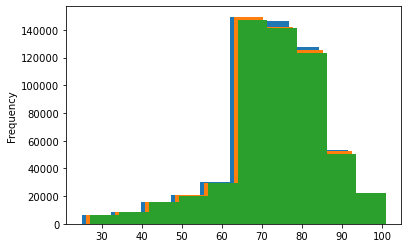

In [29]:
for year in combined_beneficiary_data_2['Year'].unique():
    combined_beneficiary_data_2.loc[(combined_beneficiary_data_2['Year']==year), 'BENE_AGE'].plot(kind='hist')

# Converting Age to Categorical

In [30]:
# combined_beneficiary_data_2["BENE_AGE_CAT"] = pd.cut(combined_beneficiary_data_2["BENE_AGE"], bins=5, labels=["25-40", "40-55", "55-70", "70-85", "85+"])

# combined_beneficiary_data_2.drop(columns=['BENE_AGE'], inplace=True, axis=1)

In [31]:
combined_beneficiary_data_2.sort_values(by=['DESYNPUF_ID', 'Year'], ascending='False', inplace=True)

In [32]:
combined_beneficiary_data_2.head(10)

,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,...,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR,Year,BENE_AGE
0,0000438E79D01BEA,1937-05-01,NaT,1,1,0,10,280,12,12,...,0.0,0.0,0.0,0.0,0.0,140.0,10.0,0.0,2008,71.0
0,0000438E79D01BEA,1937-05-01,NaT,1,1,0,10,280,12,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2009,72.0
0,0000438E79D01BEA,1937-05-01,NaT,1,1,0,10,280,12,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010,73.0
0,0000A38A6DB6581C,1928-02-01,NaT,2,3,0,5,80,12,12,...,0.0,0.0,0.0,0.0,0.0,640.0,200.0,0.0,2008,80.0
0,0000A38A6DB6581C,1928-02-01,NaT,2,3,0,5,80,12,12,...,0.0,0.0,450.0,50.0,0.0,540.0,100.0,0.0,2009,81.0
0,0000A38A6DB6581C,1928-02-01,NaT,2,3,0,5,80,12,12,...,0.0,0.0,0.0,0.0,0.0,530.0,130.0,0.0,2010,82.0
0,0000BAF51F7D7F01,1926-04-01,NaT,2,5,0,54,999,12,12,...,0.0,0.0,600.0,370.0,0.0,5180.0,1850.0,0.0,2008,82.0
0,0000BAF51F7D7F01,1926-04-01,NaT,2,5,0,54,999,12,12,...,1068.0,0.0,3470.0,800.0,0.0,4570.0,1430.0,0.0,2009,83.0
0,0000BAF51F7D7F01,1926-04-01,NaT,2,5,0,54,999,11,12,...,0.0,0.0,10.0,0.0,0.0,980.0,250.0,0.0,2010,84.0
1,0000E21D08D66187,1961-02-01,NaT,2,1,0,26,100,12,12,...,0.0,0.0,670.0,120.0,0.0,380.0,30.0,0.0,2008,47.0


# Since all the int columns are actually categories, converting them to catergorical feature

In [33]:
combined_beneficiary_data_2.dtypes

DESYNPUF_ID                         object
BENE_BIRTH_DT               datetime64[ns]
BENE_DEATH_DT               datetime64[ns]
BENE_SEX_IDENT_CD                    int64
BENE_RACE_CD                         int64
BENE_ESRD_IND                       object
SP_STATE_CODE                        int64
BENE_COUNTY_CD                       int64
BENE_HI_CVRAGE_TOT_MONS              int64
BENE_SMI_CVRAGE_TOT_MONS             int64
BENE_HMO_CVRAGE_TOT_MONS             int64
PLAN_CVRG_MOS_NUM                    int64
SP_ALZHDMTA                          int64
SP_CHF                               int64
SP_CHRNKIDN                          int64
SP_CNCR                              int64
SP_COPD                              int64
SP_DEPRESSN                          int64
SP_DIABETES                          int64
SP_ISCHMCHT                          int64
SP_OSTEOPRS                          int64
SP_RA_OA                             int64
SP_STRKETIA                          int64
MEDREIMB_IP

In [34]:
combined_beneficiary_data_2.columns

Index(['DESYNPUF_ID', 'BENE_BIRTH_DT', 'BENE_DEATH_DT', 'BENE_SEX_IDENT_CD',
       'BENE_RACE_CD', 'BENE_ESRD_IND', 'SP_STATE_CODE', 'BENE_COUNTY_CD',
       'BENE_HI_CVRAGE_TOT_MONS', 'BENE_SMI_CVRAGE_TOT_MONS',
       'BENE_HMO_CVRAGE_TOT_MONS', 'PLAN_CVRG_MOS_NUM', 'SP_ALZHDMTA',
       'SP_CHF', 'SP_CHRNKIDN', 'SP_CNCR', 'SP_COPD', 'SP_DEPRESSN',
       'SP_DIABETES', 'SP_ISCHMCHT', 'SP_OSTEOPRS', 'SP_RA_OA', 'SP_STRKETIA',
       'MEDREIMB_IP', 'BENRES_IP', 'PPPYMT_IP', 'MEDREIMB_OP', 'BENRES_OP',
       'PPPYMT_OP', 'MEDREIMB_CAR', 'BENRES_CAR', 'PPPYMT_CAR', 'Year',
       'BENE_AGE'],
      dtype='object')

In [35]:
categorical_columns = ['BENE_SEX_IDENT_CD', 'BENE_RACE_CD', 'BENE_ESRD_IND', 'SP_STATE_CODE', 'BENE_COUNTY_CD', 'SP_ALZHDMTA', 'SP_CHF', 'SP_CHRNKIDN', 'SP_CNCR', 'SP_COPD', 'SP_DEPRESSN', 'SP_DIABETES', 'SP_ISCHMCHT', 'SP_OSTEOPRS', 'SP_RA_OA', 'SP_STRKETIA']

In [36]:
combined_beneficiary_data_2[categorical_columns].astype('category').dtypes

BENE_SEX_IDENT_CD    category
BENE_RACE_CD         category
BENE_ESRD_IND        category
SP_STATE_CODE        category
BENE_COUNTY_CD       category
SP_ALZHDMTA          category
SP_CHF               category
SP_CHRNKIDN          category
SP_CNCR              category
SP_COPD              category
SP_DEPRESSN          category
SP_DIABETES          category
SP_ISCHMCHT          category
SP_OSTEOPRS          category
SP_RA_OA             category
SP_STRKETIA          category
dtype: object

# Concatinating state and county code 

In [37]:
combined_beneficiary_data_2['BENE_STATE_COUNTY_CODE'] = combined_beneficiary_data_2['SP_STATE_CODE'].astype(str) + "-" + combined_beneficiary_data_2['BENE_COUNTY_CD'].astype(str)

In [38]:
combined_beneficiary_data_2['BENE_STATE_COUNTY_CODE'].value_counts()

5-200     34870
14-141    24612
3-60      17842
10-120    12721
5-470     12574
          ...  
11-420        3
45-522        3
29-140        3
45-621        3
28-40         1
Name: BENE_STATE_COUNTY_CODE, Length: 3181, dtype: int64

In [39]:
combined_beneficiary_data_2.drop(columns=["SP_STATE_CODE", "BENE_COUNTY_CD"], inplace=True, axis=1)

In [40]:
combined_beneficiary_data_2.columns

Index(['DESYNPUF_ID', 'BENE_BIRTH_DT', 'BENE_DEATH_DT', 'BENE_SEX_IDENT_CD',
       'BENE_RACE_CD', 'BENE_ESRD_IND', 'BENE_HI_CVRAGE_TOT_MONS',
       'BENE_SMI_CVRAGE_TOT_MONS', 'BENE_HMO_CVRAGE_TOT_MONS',
       'PLAN_CVRG_MOS_NUM', 'SP_ALZHDMTA', 'SP_CHF', 'SP_CHRNKIDN', 'SP_CNCR',
       'SP_COPD', 'SP_DEPRESSN', 'SP_DIABETES', 'SP_ISCHMCHT', 'SP_OSTEOPRS',
       'SP_RA_OA', 'SP_STRKETIA', 'MEDREIMB_IP', 'BENRES_IP', 'PPPYMT_IP',
       'MEDREIMB_OP', 'BENRES_OP', 'PPPYMT_OP', 'MEDREIMB_CAR', 'BENRES_CAR',
       'PPPYMT_CAR', 'Year', 'BENE_AGE', 'BENE_STATE_COUNTY_CODE'],
      dtype='object')

In [41]:
combined_beneficiary_data_2.to_sql("Beneficiary_Data_2", con=conn_object, if_exists="replace", index=False)

In [42]:
conn_object.close()